# House Price Prediction


Importing the dependencies

In [19]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import seaborn as sns

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town  
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
- INDUS - proportion of non-retail business acres per town.  
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
- NOX - nitric oxides concentration (parts per 10 million)  
- RM - average number of rooms per dwelling  
- AGE - proportion of owner-occupied units built prior to 1940  
- DIS - weighted distances to five Boston employment centres  
- RAD - index of accessibility to radial highways  
- TAX - full-value property-tax rate per $10,000  
- PTRATIO - pupil-teacher ratio by town  
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT - % lower status of the population  
- PRICE - Median value of owner-occupied homes in $1000's  

In [179]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

house_price_dataset = pd.read_csv('housing.csv',header=None, delimiter=r"\s+",names=column_names)

In [181]:
print(house_price_dataset)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [183]:
# Dimension of the dataset
print(np.shape(house_price_dataset))

(506, 14)


In [189]:
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [185]:
# check for missing values 
house_price_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### Correlation between features

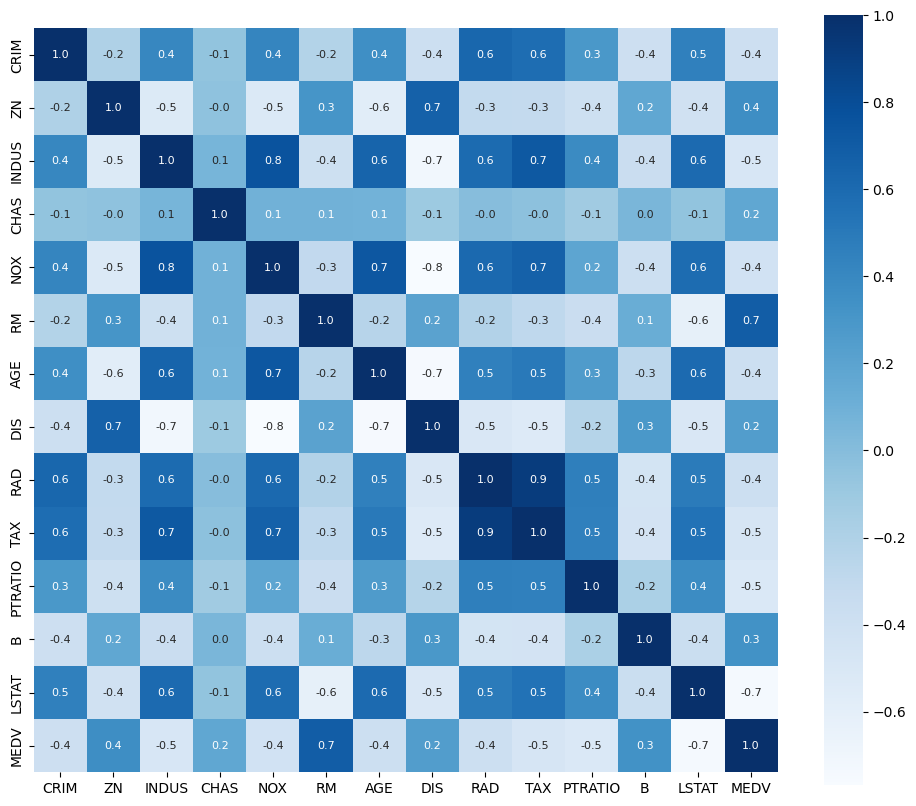

In [176]:
correlation_matrix = house_price_dataset.corr()
# Increase the size of the figure
plt.figure(figsize=(12, 10))

# Plot the heatmap with adjusted parameters
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

plt.show()

In [194]:
X=house_price_dataset.drop(columns='PRICE')
Y=house_price_dataset['PRICE']

### Spliting Training and Test data

In [200]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [202]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(506, 13) (404, 13) (102, 13)
(506,) (404,) (102,)


### Model Training using XGBoost Regressor

In [217]:
model=XGBRegressor()

In [219]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Model Evaluation

In [222]:
X_train_predict=model.predict(X_train)

In [224]:
# R squared error
score_1 = metrics.r2_score(Y_train, X_train_predict)

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, X_train_predict)

print("R squared error: ", score_1)
print("Mean absolute error: ", score_2)

R squared error:  0.9999980039471451
Mean absolute error:  0.0091330346494618


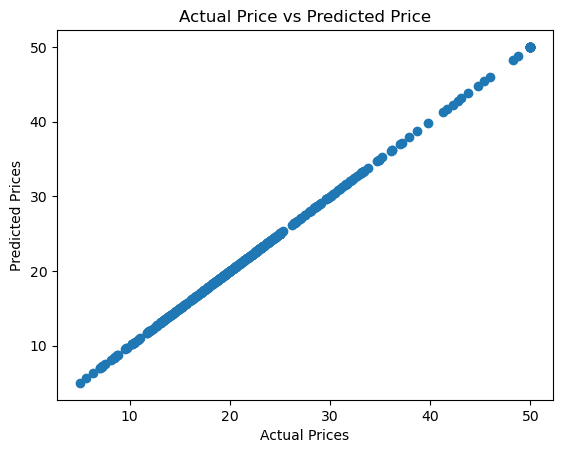

In [234]:
plt.scatter(Y_train,X_train_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [228]:
X_test_predict=model.predict(X_test)

In [230]:
# R squared error
score_1 = metrics.r2_score(Y_test, X_test_predict)

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, X_test_predict)

print("R squared error: ", score_1)
print("Mean absolute error: ", score_2)

R squared error:  0.9051721149855378
Mean absolute error:  2.0748727686264927


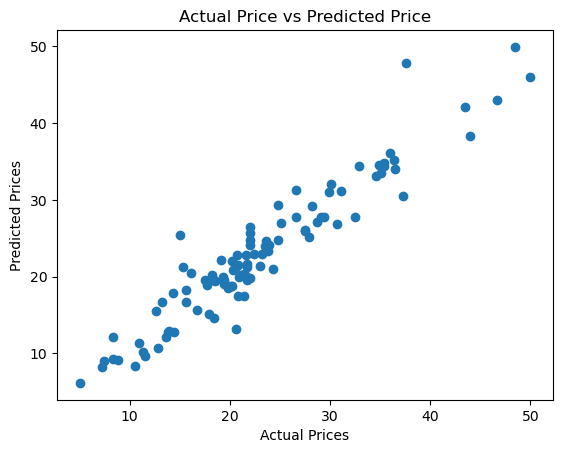

In [236]:
plt.scatter(Y_test,X_test_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()